# 추천 시스템 - 영화 데이터셋과 Rating Matrix를 활용하여 추천 모델 학습하기

- MovieLens Dataset

1.  ratings.dat <br>
  user_id : 영화를 시청한 사용자 아이디 <br>
  movie_id : 영화의 아이디 <br>
  rating : 평가점수 <br>
  time : 영화 시청 시간 <br>
<hr>
2.  movies_dat <br>
  movie_id : 영화의 아이디
  title : 영화 제목<br>
  genre : 영화 장르

### 데이터 전처리

In [1]:
# 데이터 불러오기
import pandas as pd

rating_url = "https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/ratings.dat"
rating_df = pd.io.parsers.read_csv(rating_url, names=["user_id", "movie_id", "rating", "time"], delimiter ='::', engine='python')
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
movie_url = "https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/movies.dat"
movie_df = pd.io.parsers.read_csv(movie_url, names=["movie_id", "title", "genre"], delimiter ='::', engine='python', encoding='ISO-8859-1')
movie_df.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# 사용자 수
len(rating_df["user_id"].unique())

6040

In [4]:
# 영화 수
len(rating_df["movie_id"].unique())

3706

In [5]:
import matplotlib.pyplot as plt

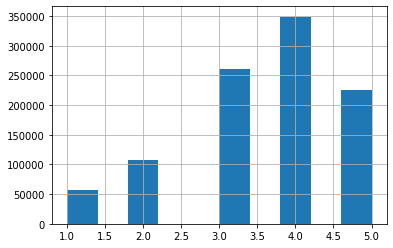

In [6]:
# 영화 평가 점수 분포
rating_df['rating'].hist();

### CF-based 모델링(KNN)

### Rating Matrix와 Colaborative Filtering(CF)

- 1. User를 Row, Item을 Column으로 하며 Value를 Rating으로 하는 행렬
- 2. Rating의 종류
  > Explicit Feedback : 영화 점수, 리뷰 점수, 좋아요 표시 ...<br>
  > Implicit Feedback : 조회, 시청, 구매, 찜 표시 ...
- 3. Rating Matrix를 추천 모델로 활용하는 방법
  > Colaborative Filtering (CF) <br>
  > Matrix Factorization (MF)

### Train/Test 데이터 분리

In [7]:
!pip install surprise

     |████████████████████████████████| 11.8MB 258kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617611 sha256=210cf7b5aec924e5cae100c0e66945583af7a3a463b412bf98b6c06520d11c06
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [8]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5)) # 1점부터 5점까지
data = Dataset.load_from_df(rating_df[["user_id", "movie_id", "rating"]], reader) # 행, 열, 행과 열이 만나는 지점에서의 rating 값
trainset, testset = train_test_split(data, test_size=0.25)

### KNN 모델 학습
- KNN? (K-Nearest Neighbor)
  - 1. 새로운(혹은 특정한) 데이터 포인트 X가 있을 때, X와 가장 유사한 k개를 이용하여 데이터 포인트 X의 위치를 찾는 알고리즘
  - 2. euclidean distance, cosine similarity 등을 기준으로 유사한 k개를 계산
  - 3. 분류(classification) 문제의 경우는 k개의 포인트에서 가장 많이 등장한 class로 할당
  - 4. 예측(regression) 문제의 경우는 k개 포인트의 평군 값, 혹은 가중치 값 등으로 X의 값을 예측.

In [9]:
# KNN 예제 코드
ab = (0.9 * 4) + (0.8 * 3) + (0.7 * 5) + (0.6 * 1)
bb = (0.9) + 0.8 + 0.7 + 0.6

ab/bb

3.3666666666666663

In [11]:
from surprise import KNNBasic
from surprise import accuracy

algo = KNNBasic(k=40, min_k=1, sim_options={"user_based":True, "name":"cosine"})
algo.fit(trainset)
predictions=algo.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### 모델링 - RMSE 평가

In [12]:
accuracy.rmse(predictions)

RMSE: 0.9756


0.975559453991923

In [13]:
# 테스트 데이터셋 일부 결과 확인 - 모델평가
predictions = algo.test(testset[:20])

In [14]:
predictions

[Prediction(uid=2715, iid=480, r_ui=1.0, est=3.75, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=5605, iid=1466, r_ui=2.0, est=3.7523097335961664, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4704, iid=1291, r_ui=4.0, est=4.048689967080009, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=1130, iid=2712, r_ui=4.0, est=3.5500179551333044, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4063, iid=1, r_ui=5.0, est=4.1, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=27, iid=1180, r_ui=4.0, est=3.9464517296092656, details={'actual_k': 37, 'was_impossible': False}),
 Prediction(uid=3033, iid=1196, r_ui=5.0, est=4.1752378009458075, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=1333, iid=432, r_ui=2.0, est=2.375453131651745, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4461, iid=2140, r_ui=4.0, est=4.024468324941689, details={'actual_k': 40, 'was